In [1]:
import pandas as pd 

data = pd.read_csv('../Dataset/soundness.csv')
data

,soundness,year,title,num_ref,num_ref_3years,arxiv,neurips,iclr,icml,aaai,...,atr37,atr38,atr39,citation_count,citedIn2018,citedIn2019,citedIn2020,citedIn2021,citedIn2022,citedIn2023
0,1,2018,A PAC-Bayesian Approach to Spectrally-Normaliz...,19,7,6,1,4,0,0,...,1,59,108,444,65.0,107.0,96.0,83.0,84.0,32.0
1,1,2020,Hamiltonian Generative Networks,31,12,4,1,6,1,0,...,5,63,186,133,0.0,8.0,52.0,47.0,30.0,9.0
2,0,2020,CM3: Cooperative Multi-goal Multi-stage Multi-...,55,23,3,6,7,9,4,...,0,111,224,188,2.0,7.0,7.0,14.0,15.0,6.0
3,0,2020,Deep Batch Active Learning by Diverse Uncertai...,48,10,8,1,7,6,2,...,1,42,150,302,1.0,6.0,55.0,116.0,142.0,67.0
4,1,2020,Robust Reinforcement Learning for Continuous C...,41,15,7,0,3,3,1,...,1,80,225,72,0.0,3.0,18.0,25.0,27.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,1,2019,Selfless Sequential Learning,48,12,12,0,6,1,0,...,1,34,167,86,3.0,17.0,23.0,24.0,22.0,6.0
3161,0,2019,Model-Predictive Policy Learning with Uncertai...,47,13,0,0,2,5,0,...,1,85,200,88,0.0,22.0,25.0,18.0,24.0,8.0
3162,0,2019,CBOW Is Not All You Need: Combining CBOW with ...,32,19,4,7,3,0,0,...,2,41,152,11,0.0,2.0,2.0,6.0,1.0,0.0
3163,0,2018,Deep Bayesian Bandits Showdown: An Empirical ...,47,12,4,1,8,7,1,...,3,76,266,253,15.0,45.0,70.0,80.0,47.0,21.0


In [2]:
label_counts = data.groupby(['title', 'soundness']).size().unstack(fill_value=0)
dominant_labels = label_counts.idxmax(axis=1)
data = data.merge(dominant_labels.rename('dominant_label'), left_on='title', right_index=True)
df_filtered = data[data['soundness'] == data['dominant_label']]

label_counts_0 = data[data['soundness'] == 0].groupby('title').size().rename('count_0')
label_counts_1 = data[data['soundness'] == 1].groupby('title').size().rename('count_1')

df_filtered = df_filtered.merge(label_counts_0, left_on='title', right_index=True, how='left')
df_filtered = df_filtered.merge(label_counts_1, left_on='title', right_index=True, how='left')

df_filtered = df_filtered[df_filtered['count_0'] != df_filtered['count_1']]
df_filtered = df_filtered.drop(['dominant_label', 'count_0', 'count_1'], axis=1)

In [3]:
data = df_filtered.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 3159
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   soundness       1241 non-null   int64  
 1   year            1241 non-null   int64  
 2   title           1241 non-null   object 
 3   num_ref         1241 non-null   int64  
 4   num_ref_3years  1241 non-null   int64  
 5   arxiv           1241 non-null   int64  
 6   neurips         1241 non-null   int64  
 7   iclr            1241 non-null   int64  
 8   icml            1241 non-null   int64  
 9   aaai            1241 non-null   int64  
 10  iccv            1241 non-null   int64  
 11  cvpr            1241 non-null   int64  
 12  emnlp           1241 non-null   int64  
 13  acl             1241 non-null   int64  
 14  naacl           1241 non-null   int64  
 15  eccv            1241 non-null   int64  
 16  icra            1241 non-null   int64  
 17  icassp          1241 non-null   i

<Axes: xlabel='soundness', ylabel='count'>

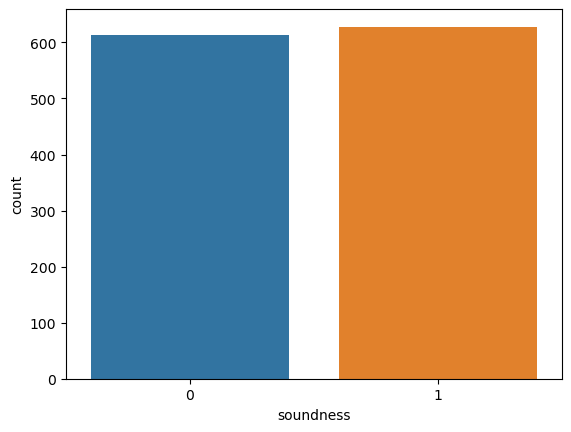

In [4]:
import seaborn as sns

sns.countplot(x=data['soundness'])

In [5]:
import plotly.graph_objects as go
import numpy as np

def correlation_matrix(dataframe):
    df_corr = dataframe.corr()
    fig = go.Figure()
    fig.add_trace(
        go.Heatmap(
            x = df_corr.columns,
            y = df_corr.index,
            z = np.array(df_corr),
            text=df_corr.values,
            texttemplate='%{text:.2f}'
        )
    )
    fig.show()

## Citing Sentence Predictor

In [6]:
citing_sentence = data[['atr0', 'atr1', 'atr2', 'atr3', 'atr4', 'atr5', 'atr6', 'atr7', 'atr8', 'atr9', 'atr10', 'atr11', 'atr12', 'atr13', 'atr14', 'atr15', 'atr16', 'atr17', 'atr18', 'atr19']]
y = data['soundness']

In [7]:
dataframe = citing_sentence.join([y])
correlation_matrix(dataframe)

In [8]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

def find_chi(features, y, k):
    chi_square = SelectKBest(score_func=chi2, k=k)
    fit = chi_square.fit(features, y)
    
    selected_feature_indices = chi_square.get_support(indices=True)
    feature_names = features.columns
    chi2_scores = fit.scores_
    feature_score_dict = dict(zip(feature_names, chi2_scores))
    sorted_features = sorted(feature_score_dict.items(), key=lambda x: x[1], reverse=True)
    selected_feature_names = [feature[0] for feature in sorted_features[:k]]
    
    print("Selected Feature Names:", selected_feature_names)
    x_chi = chi_square.fit_transform(features, y)
    
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x_chi)
    
    x_res, y_res = oversampling(x, y)
    x_train, x_test, y_train, y_test = train_split(x_res, y_res)
    return x_train, x_test, y_train, y_test, selected_feature_names

In [9]:
from imblearn.over_sampling import SMOTE

def oversampling(x, y):
    sm = SMOTE(random_state=123)
    x_res, y_res = sm.fit_resample(x, y)
    return x_res, y_res

In [10]:
from sklearn.model_selection import train_test_split

def train_split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
    return x_train, x_test, y_train, y_test

In [11]:
test = pd.DataFrame(columns=['Features', 'Accuracy'])

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def model(features, y, i):
    model = XGBClassifier()
    x_train, x_test, y_train, y_test, selected_feature_names = find_chi(features, y, i)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions)
    new_data = pd.DataFrame({'Features': [selected_feature_names], 'Accuracy': ["%.2f%%" % (accuracy * 100.0)]})
    global test
    test = pd.concat([test, new_data], ignore_index=True)
    return accuracy

In [13]:
for i in dict(enumerate(citing_sentence)):
    accuracy = model(citing_sentence, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr14']
Accuracy: 53.17%
Selected Feature Names: ['atr14', 'atr12']
Accuracy: 54.76%
Selected Feature Names: ['atr14', 'atr12', 'atr7']
Accuracy: 50.79%
Selected Feature Names: ['atr14', 'atr12', 'atr7', 'atr2']
Accuracy: 49.60%
Selected Feature Names: ['atr14', 'atr12', 'atr7', 'atr2', 'atr6']
Accuracy: 53.17%
Selected Feature Names: ['atr14', 'atr12', 'atr7', 'atr2', 'atr6', 'atr9']
Accuracy: 51.98%
Selected Feature Names: ['atr14', 'atr12', 'atr7', 'atr2', 'atr6', 'atr9', 'atr16']
Accuracy: 51.59%
Selected Feature Names: ['atr14', 'atr12', 'atr7', 'atr2', 'atr6', 'atr9', 'atr16', 'atr0']
Accuracy: 53.97%
Selected Feature Names: ['atr14', 'atr12', 'atr7', 'atr2', 'atr6', 'atr9', 'atr16', 'atr0', 'atr8']
Accuracy: 51.98%
Selected Feature Names: ['atr14', 'atr12', 'atr7', 'atr2', 'atr6', 'atr9', 'atr16', 'atr0', 'atr8', 'atr4']
Accuracy: 51.98%
Selected Feature Names: ['atr14', 'atr12', 'atr7', 'atr2', 'atr6', 'atr9', 'atr16', 'atr0', 'atr8', 'atr4', 'atr11']


## Regular Sentences Predictor

In [14]:
regular_sentences = data[['atr20', 'atr21', 'atr22', 'atr23', 'atr24', 'atr25', 'atr26', 'atr27', 'atr28', 'atr29', 'atr30', 'atr31', 'atr32', 'atr33', 'atr34', 'atr35', 'atr36', 'atr37', 'atr38', 'atr39']]

In [15]:
dataframe = regular_sentences.join([y])
correlation_matrix(dataframe)

In [16]:
for i in dict(enumerate(regular_sentences)):
    accuracy = model(regular_sentences, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr38']
Accuracy: 47.22%
Selected Feature Names: ['atr38', 'atr39']
Accuracy: 45.24%
Selected Feature Names: ['atr38', 'atr39', 'atr22']
Accuracy: 45.24%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'atr34']
Accuracy: 47.62%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'atr34', 'atr29']
Accuracy: 47.62%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'atr34', 'atr29', 'atr25']
Accuracy: 46.03%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'atr34', 'atr29', 'atr25', 'atr33']
Accuracy: 47.22%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'atr34', 'atr29', 'atr25', 'atr33', 'atr27']
Accuracy: 44.84%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'atr34', 'atr29', 'atr25', 'atr33', 'atr27', 'atr23']
Accuracy: 43.25%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'atr34', 'atr29', 'atr25', 'atr33', 'atr27', 'atr23', 'atr31']
Accuracy: 47.62%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'atr34', 'atr29', 'atr25', 'atr33

## Reference-Based Predictor

In [17]:
reference_based = data[['num_ref', 'num_ref_3years', 'arxiv', 'neurips', 'iclr', 'icml', 'aaai', 'iccv', 'cvpr', 'emnlp', 'acl', 'naacl', 'eccv', 'icra', 'icassp', 'ijcai', 'aistats', 'sigkdd', 'neuralcom', 'ieee_tran', 'acm_tran', 'mit_press', 'nature', 'jmlr']]

In [18]:
dataframe = reference_based.join([y])
correlation_matrix(dataframe)

In [19]:
for i in dict(enumerate(reference_based)):
    accuracy = model(reference_based, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['eccv']
Accuracy: 53.57%
Selected Feature Names: ['eccv', 'icassp']
Accuracy: 54.37%
Selected Feature Names: ['eccv', 'icassp', 'emnlp']
Accuracy: 57.54%
Selected Feature Names: ['eccv', 'icassp', 'emnlp', 'acl']
Accuracy: 56.35%
Selected Feature Names: ['eccv', 'icassp', 'emnlp', 'acl', 'nature']
Accuracy: 53.97%
Selected Feature Names: ['eccv', 'icassp', 'emnlp', 'acl', 'nature', 'naacl']
Accuracy: 53.97%
Selected Feature Names: ['eccv', 'icassp', 'emnlp', 'acl', 'nature', 'naacl', 'iccv']
Accuracy: 52.78%
Selected Feature Names: ['eccv', 'icassp', 'emnlp', 'acl', 'nature', 'naacl', 'iccv', 'cvpr']
Accuracy: 53.57%
Selected Feature Names: ['eccv', 'icassp', 'emnlp', 'acl', 'nature', 'naacl', 'iccv', 'cvpr', 'icra']
Accuracy: 55.16%
Selected Feature Names: ['eccv', 'icassp', 'emnlp', 'acl', 'nature', 'naacl', 'iccv', 'cvpr', 'icra', 'icml']
Accuracy: 49.60%
Selected Feature Names: ['eccv', 'icassp', 'emnlp', 'acl', 'nature', 'naacl', 'iccv', 'cvpr', 'icra', 'i

## Combination Predictor

In [20]:
combination = citing_sentence.join([regular_sentences, reference_based])

In [21]:
for i in dict(enumerate(combination)):
    accuracy = model(combination, y, i+1)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Selected Feature Names: ['atr38']
Accuracy: 47.22%
Selected Feature Names: ['atr38', 'atr39']
Accuracy: 45.24%
Selected Feature Names: ['atr38', 'atr39', 'atr22']
Accuracy: 45.24%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'eccv']
Accuracy: 48.41%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'eccv', 'atr14']
Accuracy: 48.02%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'eccv', 'atr14', 'icassp']
Accuracy: 52.78%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'eccv', 'atr14', 'icassp', 'atr12']
Accuracy: 50.00%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'eccv', 'atr14', 'icassp', 'atr12', 'emnlp']
Accuracy: 48.81%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'eccv', 'atr14', 'icassp', 'atr12', 'emnlp', 'atr7']
Accuracy: 53.97%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'eccv', 'atr14', 'icassp', 'atr12', 'emnlp', 'atr7', 'atr2']
Accuracy: 48.81%
Selected Feature Names: ['atr38', 'atr39', 'atr22', 'eccv', 'atr14', 'icassp', 'atr12', 'e

In [22]:
test.to_excel('soundness.xlsx', index=False)